In [1]:
import os
import cv2
import numpy as np


parent_dir = '/Users/saikarthik/Desktop/scp/dataset'


categories = os.listdir(parent_dir)


category_images = {}
category_labels = {}


for category in categories:
    category_dir = os.path.join(parent_dir, category)
    

    if os.path.isdir(category_dir) and category != '.DS_Store':
        all_files = os.listdir(category_dir)
        image_files = [filename for filename in all_files if filename.lower().endswith(('.png', '.jpg', '.jpeg'))]
        images = []  # An empty list to store the processed images for the current category
        labels = [category] * len(image_files)
        

        for image_file in image_files:
            image_path = os.path.join(category_dir, image_file)
            image = cv2.imread(image_path)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converting to RGB format
            resized_image = cv2.resize(image_rgb, (224, 224))  # Resizing the image to a 224x224 pixel size
            images.append(resized_image)
    
        category_images[category] = np.array(images)
        category_labels[category] = np.array(labels)

        print(f"Shape of images for category '{category}': {category_images[category].shape}")


Shape of images for category 'VeryMildDemented': (2308, 224, 224, 3)
Shape of images for category 'ModerateDemented': (132, 224, 224, 3)
Shape of images for category 'MildDemented': (964, 224, 224, 3)
Shape of images for category 'NonDemented': (3268, 224, 224, 3)


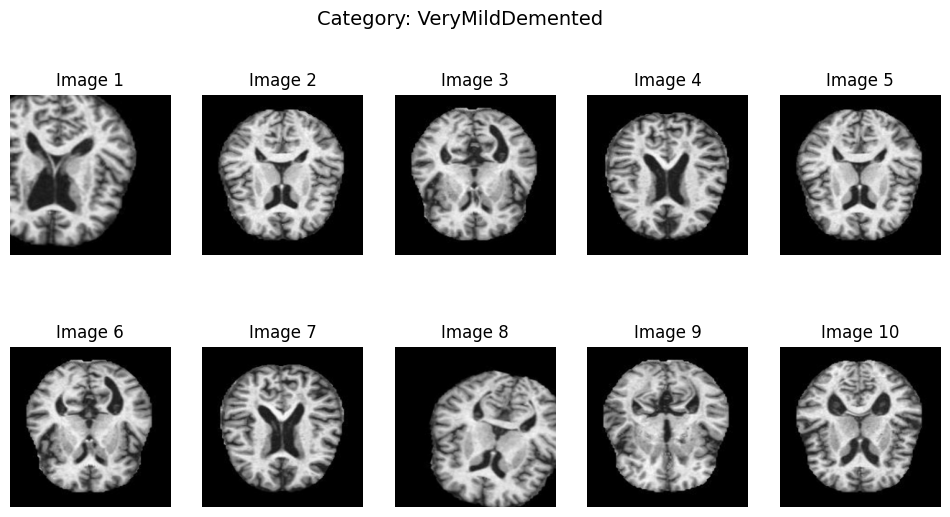

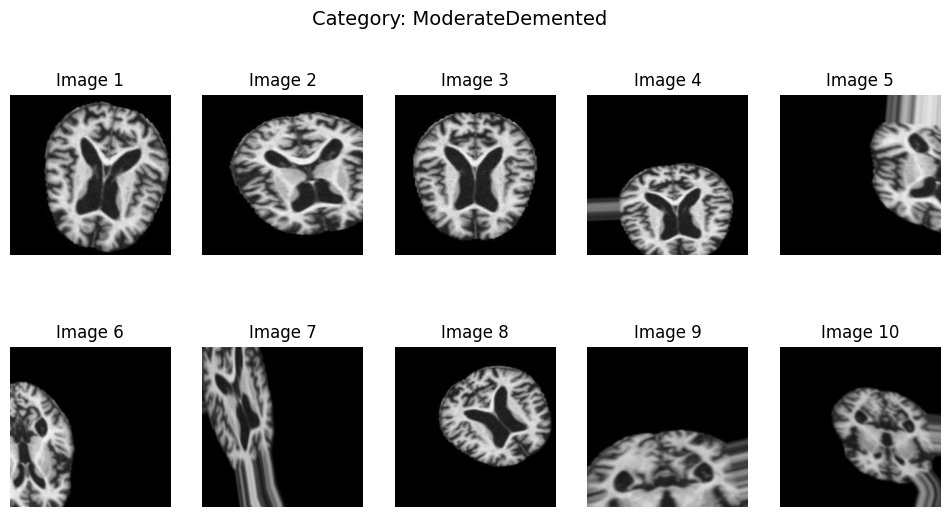

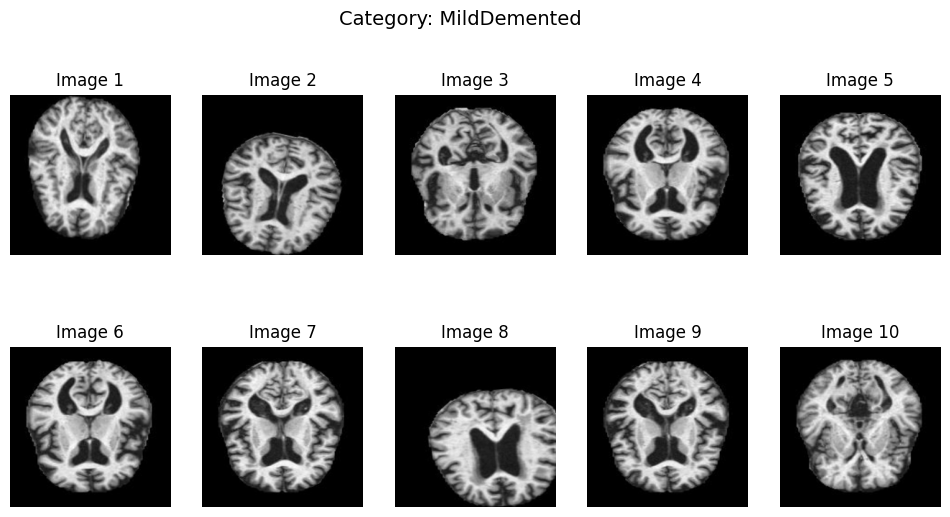

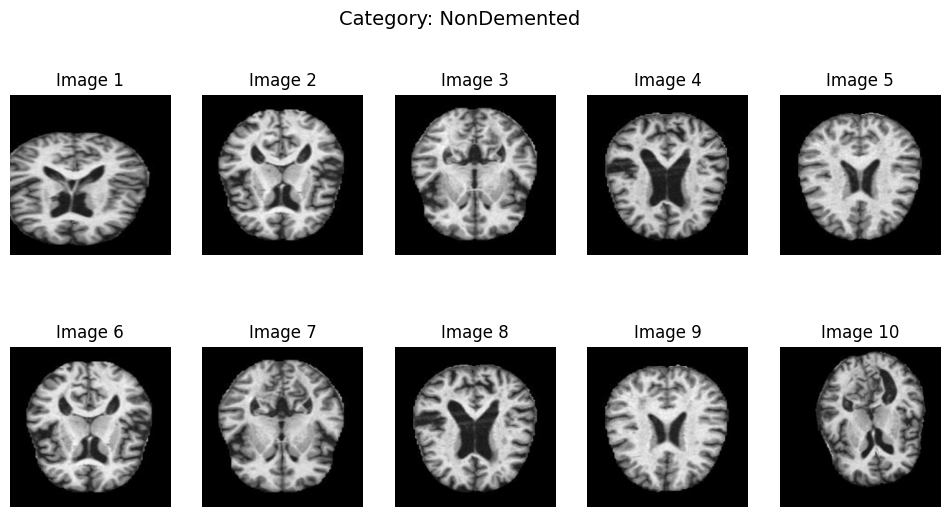

In [2]:
import matplotlib.pyplot as plt


for category in categories:
    if category not in category_images:
        continue
    
    sample_images = category_images[category][:10]  # Taking the first 10 images as a sample

    plt.figure(figsize=(12, 6))
    for i in range(len(sample_images)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(sample_images[i])
        plt.title(f"Image {i+1}")
        plt.axis('off')
    plt.suptitle(f"Category: {category}", fontsize=14)
    plt.show()


In [3]:

for category in category_images:
    category_images[category] = category_images[category] / 255.0


min_value = np.min(category_images[category])
max_value = np.max(category_images[category])


print(f"Minimum Pixel Value: {min_value}")
print(f"Maximum Pixel Value: {max_value}")


Minimum Pixel Value: 0.0
Maximum Pixel Value: 1.0


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,  # Rotating the image by up to 20 degrees
    width_shift_range=0.2,  # Shifting the width by up to 20% of the image width
    height_shift_range=0.2,  # Shifting the height by up to 20% of the image height
    shear_range=0.2, 
    zoom_range=0.2,  # Zoom in by up to 20%
    horizontal_flip=True,  # Fliping the image horizontally
    fill_mode='nearest'  # Fill in new pixels with the nearest existing pixel
)

output_dir = '/Users/saikarthik/Desktop/scp/dataset'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for category in categories:
    if category not in category_images:
        continue

    images = category_images[category]
    category_output_dir = os.path.join(output_dir, category)
    if not os.path.exists(category_output_dir):
        os.makedirs(category_output_dir)
    i = 0
    for batch in datagen.flow(images, batch_size=1):
        augmented_image = batch[0]
        augmented_image = (augmented_image * 255).astype(np.uint8)  
        filename = f'{i}.jpg' 
        save_path = os.path.join(category_output_dir, filename)
        cv2.imwrite(save_path, cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))
        i += 1
        if i >= 100:  
            break


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import os

output_dir = '/Users/saikarthik/Desktop/scp/dataug_outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def perform_augmentation(operation_name, datagen, images, category, sample_count=5):
    print(f"Performing: {operation_name}")
    category_output_dir = os.path.join(output_dir, category, operation_name)
    create_dir(category_output_dir)
    i = 0
    for batch in datagen.flow(images, batch_size=1):
        augmented_image = batch[0]
        augmented_image = (augmented_image * 255).astype(np.uint8)
        filename = f'{i}.jpg'
        save_path = os.path.join(category_output_dir, filename)
        cv2.imwrite(save_path, cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))
        print(f"Saved: {save_path}")
        i += 1
        if i >= sample_count:  
            break

augmentations = {
    "rotation": ImageDataGenerator(rotation_range=20),
    "width_shift": ImageDataGenerator(width_shift_range=0.2),
    "height_shift": ImageDataGenerator(height_shift_range=0.2),
    "shear": ImageDataGenerator(shear_range=0.2),
    "zoom": ImageDataGenerator(zoom_range=0.2),
    "horizontal_flip": ImageDataGenerator(horizontal_flip=True),
}

# Process each category
for category in categories:
    if category not in category_images:
        continue

    images = category_images[category]

    # Perform individual augmentations
    for operation_name, datagen in augmentations.items():
        perform_augmentation(operation_name, datagen, images, category, sample_count=5)

    # Final combined augmentation
    combined_datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    perform_augmentation("final_combined", combined_datagen, images, category, sample_count=10)


Performing: rotation
Saved: /Users/saikarthik/Desktop/scp/dataug_outputs/VeryMildDemented/rotation/0.jpg
Saved: /Users/saikarthik/Desktop/scp/dataug_outputs/VeryMildDemented/rotation/1.jpg
Saved: /Users/saikarthik/Desktop/scp/dataug_outputs/VeryMildDemented/rotation/2.jpg
Saved: /Users/saikarthik/Desktop/scp/dataug_outputs/VeryMildDemented/rotation/3.jpg
Saved: /Users/saikarthik/Desktop/scp/dataug_outputs/VeryMildDemented/rotation/4.jpg
Performing: width_shift
Saved: /Users/saikarthik/Desktop/scp/dataug_outputs/VeryMildDemented/width_shift/0.jpg
Saved: /Users/saikarthik/Desktop/scp/dataug_outputs/VeryMildDemented/width_shift/1.jpg
Saved: /Users/saikarthik/Desktop/scp/dataug_outputs/VeryMildDemented/width_shift/2.jpg
Saved: /Users/saikarthik/Desktop/scp/dataug_outputs/VeryMildDemented/width_shift/3.jpg
Saved: /Users/saikarthik/Desktop/scp/dataug_outputs/VeryMildDemented/width_shift/4.jpg
Performing: height_shift
Saved: /Users/saikarthik/Desktop/scp/dataug_outputs/VeryMildDemented/height

In [ ]:
import tensorflow.keras.applications as apps
print(dir(apps)) 


['ConvNeXtBase', 'ConvNeXtLarge', 'ConvNeXtSmall', 'ConvNeXtTiny', 'ConvNeXtXLarge', 'DenseNet121', 'DenseNet169', 'DenseNet201', 'EfficientNetB0', 'EfficientNetB1', 'EfficientNetB2', 'EfficientNetB3', 'EfficientNetB4', 'EfficientNetB5', 'EfficientNetB6', 'EfficientNetB7', 'EfficientNetV2B0', 'EfficientNetV2B1', 'EfficientNetV2B2', 'EfficientNetV2B3', 'EfficientNetV2L', 'EfficientNetV2M', 'EfficientNetV2S', 'InceptionResNetV2', 'InceptionV3', 'MobileNet', 'MobileNetV2', 'MobileNetV3Large', 'MobileNetV3Small', 'NASNetLarge', 'NASNetMobile', 'RegNetX002', 'RegNetX004', 'RegNetX006', 'RegNetX008', 'RegNetX016', 'RegNetX032', 'RegNetX040', 'RegNetX064', 'RegNetX080', 'RegNetX120', 'RegNetX160', 'RegNetX320', 'RegNetY002', 'RegNetY004', 'RegNetY006', 'RegNetY008', 'RegNetY016', 'RegNetY032', 'RegNetY040', 'RegNetY064', 'RegNetY080', 'RegNetY120', 'RegNetY160', 'RegNetY320', 'ResNet101', 'ResNet101V2', 'ResNet152', 'ResNet152V2', 'ResNet50', 'ResNet50V2', 'ResNetRS101', 'ResNetRS152', 'ResNe

In [15]:
import os
import cv2
import numpy as np
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

# Load MobileNetV3 Small pre-trained on ImageNet
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the layer from which to extract features
# Typically you would use the last convolutional layer for feature extraction
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Directory containing the dataset
parent_dir = '/Users/saikarthik/Desktop/scp/dataset'

# List of category names (subdirectories in the parent directory)
categories = os.listdir(parent_dir)

# Initialize dictionaries to store features and labels
category_features = {}
category_labels = {}

# Loop through each category and extract features from images
for category in categories:
    category_dir = os.path.join(parent_dir, category)

    # Check if the directory is valid and not a system file
    if os.path.isdir(category_dir) and category != '.DS_Store':
        # Get all image files in the directory
        all_files = os.listdir(category_dir)
        
        # Filter for image files with .png, .jpg, or .jpeg extensions
        image_files = [filename for filename in all_files if filename.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        features = []  # List to store features for this category
        labels = [category] * len(image_files)  # List to store the corresponding labels
        
        # Loop through each image file and extract features
        for image_file in image_files:
            image_path = os.path.join(category_dir, image_file)
            img = cv2.imread(image_path)  # Read the image
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            resized_image = cv2.resize(img_rgb, (224, 224))  # Resize the image to 224x224
            preprocessed_image = preprocess_input(np.expand_dims(resized_image, axis=0))  # Preprocess the image

            # Extract features from the image using the feature extractor model
            feature = feature_extractor.predict(preprocessed_image)
            feature = feature.flatten()  # Flatten the output to a 1D array

            features.append(feature)
        
        category_features[category] = np.array(features)
        category_labels[category] = np.array(labels)
        

2024-11-22 11:30:59.128274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 22ms/step


In [18]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

layer_names = [layer.name for layer in base_model.layers]

intermediate_models = [Model(inputs=base_model.input, outputs=base_model.get_layer(name).output) for name in layer_names]

parent_dir = '/Users/saikarthik/Desktop/scp/dataset'

categories = [category for category in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, category))]

print(f"Categories found: {categories}")

for category in categories:
    category_dir = os.path.join(parent_dir, category)
    
    image_files = [f for f in os.listdir(category_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    print(f"Category: {category}, Number of images: {len(image_files)}")
    
    if not image_files:
        print(f"  No valid images found in {category}. Skipping.")
        continue

    image_path = os.path.join(category_dir, image_files[0])
    image = cv2.imread(image_path)

    if image is None:
        print(f"  Unable to read {image_path}. Skipping.")
        continue

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image_rgb, (224, 224))
    preprocessed_image = preprocess_input(np.expand_dims(resized_image, axis=0))

    print(f"Category: {category}, Representative Image: {image_files[0]}")
    
    for model, name in zip(intermediate_models, layer_names):
        output = model.predict(preprocessed_image)
        print(f"    Layer: {name}, Output shape: {output.shape}")
    
    print("-" * 50)


Categories found: ['VeryMildDemented', 'ModerateDemented', 'MildDemented', 'NonDemented']
Category: VeryMildDemented, Number of images: 2308
Category: VeryMildDemented, Representative Image: 63.jpg
1/1 [==============================] - 0s 18ms/step
    Layer: input_5, Output shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 110ms/step
    Layer: rescaling_4, Output shape: (1, 224, 224, 3)


2024-11-22 11:39:36.482527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-22 11:39:36.523398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-22 11:39:36.650988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 78ms/step
    Layer: Conv, Output shape: (1, 112, 112, 16)
1/1 [==============================] - 0s 47ms/step
    Layer: Conv/BatchNorm, Output shape: (1, 112, 112, 16)
1/1 [==============================] - 0s 58ms/step
    Layer: tf.__operators__.add_108, Output shape: (1, 112, 112, 16)


2024-11-22 11:39:36.750337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-22 11:39:36.819003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-22 11:39:36.896836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 91ms/step
    Layer: re_lu_128, Output shape: (1, 112, 112, 16)
1/1 [==============================] - 0s 122ms/step
    Layer: tf.math.multiply_108, Output shape: (1, 112, 112, 16)


2024-11-22 11:39:37.011863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-22 11:39:37.148003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 114ms/step
    Layer: multiply_72, Output shape: (1, 112, 112, 16)
1/1 [==============================] - 0s 96ms/step
    Layer: expanded_conv/depthwise/pad, Output shape: (1, 113, 113, 16)


2024-11-22 11:39:37.288389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-22 11:39:37.440195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 187ms/step
    Layer: expanded_conv/depthwise, Output shape: (1, 56, 56, 16)
1/1 [==============================] - 0s 130ms/step
    Layer: expanded_conv/depthwise/BatchNorm, Output shape: (1, 56, 56, 16)


2024-11-22 11:39:37.605339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-22 11:39:37.755341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 108ms/step
    Layer: re_lu_129, Output shape: (1, 56, 56, 16)
1/1 [==============================] - 0s 120ms/step
    Layer: expanded_conv/squeeze_excite/AvgPool, Output shape: (1, 1, 1, 16)


2024-11-22 11:39:37.895211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-22 11:39:38.033456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 222ms/step
    Layer: expanded_conv/squeeze_excite/Conv, Output shape: (1, 1, 1, 8)
1/1 [==============================] - 0s 134ms/step
    Layer: expanded_conv/squeeze_excite/Relu, Output shape: (1, 1, 1, 8)


2024-11-22 11:39:38.279459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-22 11:39:38.434432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 157ms/step
    Layer: expanded_conv/squeeze_excite/Conv_1, Output shape: (1, 1, 1, 16)
1/1 [==============================] - 0s 226ms/step


2024-11-22 11:39:38.608688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    Layer: tf.__operators__.add_109, Output shape: (1, 1, 1, 16)
1/1 [==============================] - 0s 154ms/step
    Layer: re_lu_130, Output shape: (1, 1, 1, 16)


2024-11-22 11:39:38.852673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-22 11:39:39.025687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 188ms/step
    Layer: tf.math.multiply_109, Output shape: (1, 1, 1, 16)
1/1 [==============================] - 0s 230ms/step


2024-11-22 11:39:39.231430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    Layer: expanded_conv/squeeze_excite/Mul, Output shape: (1, 56, 56, 16)


2024-11-22 11:39:39.481304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 254ms/step
    Layer: expanded_conv/project, Output shape: (1, 56, 56, 16)
1/1 [==============================] - 0s 192ms/step


2024-11-22 11:39:39.757043: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    Layer: expanded_conv/project/BatchNorm, Output shape: (1, 56, 56, 16)


2024-11-22 11:39:39.971338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 254ms/step
    Layer: expanded_conv_1/expand, Output shape: (1, 56, 56, 72)
1/1 [==============================] - 0s 166ms/step
    Layer: expanded_conv_1/expand/BatchNorm, Output shape: (1, 56, 56, 72)


2024-11-22 11:39:40.245285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-22 11:39:40.444735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 245ms/step
    Layer: re_lu_131, Output shape: (1, 56, 56, 72)


2024-11-22 11:39:40.709816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 304ms/step
    Layer: expanded_conv_1/depthwise/pad, Output shape: (1, 57, 57, 72)


2024-11-22 11:39:41.039288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 280ms/step
    Layer: expanded_conv_1/depthwise, Output shape: (1, 28, 28, 72)


2024-11-22 11:39:41.344317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 326ms/step
    Layer: expanded_conv_1/depthwise/BatchNorm, Output shape: (1, 28, 28, 72)


2024-11-22 11:39:41.686444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 244ms/step
    Layer: re_lu_132, Output shape: (1, 28, 28, 72)
1/1 [==============================] - 0s 220ms/step


2024-11-22 11:39:41.954830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    Layer: expanded_conv_1/project, Output shape: (1, 28, 28, 24)
1/1 [==============================] - 0s 244ms/step


2024-11-22 11:39:42.198024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    Layer: expanded_conv_1/project/BatchNorm, Output shape: (1, 28, 28, 24)
1/1 [==============================] - 0s 245ms/step


2024-11-22 11:39:42.456582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    Layer: expanded_conv_2/expand, Output shape: (1, 28, 28, 88)


2024-11-22 11:39:42.722076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 255ms/step
    Layer: expanded_conv_2/expand/BatchNorm, Output shape: (1, 28, 28, 88)


2024-11-22 11:39:43.017579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 288ms/step
    Layer: re_lu_133, Output shape: (1, 28, 28, 88)


2024-11-22 11:39:43.312377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 309ms/step
    Layer: expanded_conv_2/depthwise, Output shape: (1, 28, 28, 88)


2024-11-22 11:39:43.657517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 441ms/step
    Layer: expanded_conv_2/depthwise/BatchNorm, Output shape: (1, 28, 28, 88)


2024-11-22 11:39:44.122545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 342ms/step
    Layer: re_lu_134, Output shape: (1, 28, 28, 88)


2024-11-22 11:39:44.497684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 356ms/step
    Layer: expanded_conv_2/project, Output shape: (1, 28, 28, 24)


2024-11-22 11:39:44.866934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 444ms/step
    Layer: expanded_conv_2/project/BatchNorm, Output shape: (1, 28, 28, 24)


2024-11-22 11:39:45.330218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 443ms/step
    Layer: expanded_conv_2/Add, Output shape: (1, 28, 28, 24)


2024-11-22 11:39:45.786877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 393ms/step
    Layer: expanded_conv_3/expand, Output shape: (1, 28, 28, 96)


2024-11-22 11:39:46.231673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 324ms/step
    Layer: expanded_conv_3/expand/BatchNorm, Output shape: (1, 28, 28, 96)


2024-11-22 11:39:46.538960: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 349ms/step
    Layer: tf.__operators__.add_110, Output shape: (1, 28, 28, 96)


2024-11-22 11:39:46.912054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 356ms/step
    Layer: re_lu_135, Output shape: (1, 28, 28, 96)


2024-11-22 11:39:47.287536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 366ms/step
    Layer: tf.math.multiply_110, Output shape: (1, 28, 28, 96)


2024-11-22 11:39:47.673398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 394ms/step
    Layer: multiply_73, Output shape: (1, 28, 28, 96)


2024-11-22 11:39:54.758014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 7s 7s/step
    Layer: expanded_conv_3/depthwise/pad, Output shape: (1, 31, 31, 96)


2024-11-22 11:39:55.125211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 444ms/step
    Layer: expanded_conv_3/depthwise, Output shape: (1, 14, 14, 96)


2024-11-22 11:39:55.593944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 316ms/step
    Layer: expanded_conv_3/depthwise/BatchNorm, Output shape: (1, 14, 14, 96)


2024-11-22 11:39:55.926609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 399ms/step
    Layer: tf.__operators__.add_111, Output shape: (1, 14, 14, 96)


2024-11-22 11:39:56.346153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 301ms/step
    Layer: re_lu_136, Output shape: (1, 14, 14, 96)


2024-11-22 11:39:56.663706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 287ms/step
    Layer: tf.math.multiply_111, Output shape: (1, 14, 14, 96)


2024-11-22 11:39:56.976280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 310ms/step
    Layer: multiply_74, Output shape: (1, 14, 14, 96)


2024-11-22 11:39:57.309159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 331ms/step
    Layer: expanded_conv_3/squeeze_excite/AvgPool, Output shape: (1, 1, 1, 96)


2024-11-22 11:39:57.657960: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 358ms/step
    Layer: expanded_conv_3/squeeze_excite/Conv, Output shape: (1, 1, 1, 24)


2024-11-22 11:39:58.082478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 491ms/step
    Layer: expanded_conv_3/squeeze_excite/Relu, Output shape: (1, 1, 1, 24)


2024-11-22 11:39:58.553827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 462ms/step
    Layer: expanded_conv_3/squeeze_excite/Conv_1, Output shape: (1, 1, 1, 96)


2024-11-22 11:39:59.035017: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 374ms/step
    Layer: tf.__operators__.add_112, Output shape: (1, 1, 1, 96)


2024-11-22 11:39:59.422334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 349ms/step
    Layer: re_lu_137, Output shape: (1, 1, 1, 96)


2024-11-22 11:39:59.793988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 377ms/step
    Layer: tf.math.multiply_112, Output shape: (1, 1, 1, 96)


2024-11-22 11:40:00.194231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 372ms/step
    Layer: expanded_conv_3/squeeze_excite/Mul, Output shape: (1, 14, 14, 96)


2024-11-22 11:40:00.586340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 412ms/step
    Layer: expanded_conv_3/project, Output shape: (1, 14, 14, 40)


2024-11-22 11:40:01.020189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 400ms/step
    Layer: expanded_conv_3/project/BatchNorm, Output shape: (1, 14, 14, 40)


2024-11-22 11:40:01.444150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 411ms/step
    Layer: expanded_conv_4/expand, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:01.915730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 430ms/step
    Layer: expanded_conv_4/expand/BatchNorm, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:02.359375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 548ms/step
    Layer: tf.__operators__.add_113, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:02.934940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 441ms/step
    Layer: re_lu_138, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:03.386850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 430ms/step
    Layer: tf.math.multiply_113, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:03.848294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 428ms/step
    Layer: multiply_75, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:04.287973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 463ms/step
    Layer: expanded_conv_4/depthwise, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:04.770122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 450ms/step
    Layer: expanded_conv_4/depthwise/BatchNorm, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:05.244168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 604ms/step
    Layer: tf.__operators__.add_114, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:05.868369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 439ms/step
    Layer: re_lu_139, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:06.324969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 472ms/step
    Layer: tf.math.multiply_114, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:06.819653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 500ms/step
    Layer: multiply_76, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:07.339657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 502ms/step
    Layer: expanded_conv_4/squeeze_excite/AvgPool, Output shape: (1, 1, 1, 240)


2024-11-22 11:40:07.869081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 683ms/step
    Layer: expanded_conv_4/squeeze_excite/Conv, Output shape: (1, 1, 1, 64)


2024-11-22 11:40:08.572658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 568ms/step
    Layer: expanded_conv_4/squeeze_excite/Relu, Output shape: (1, 1, 1, 64)


2024-11-22 11:40:09.192212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 677ms/step
    Layer: expanded_conv_4/squeeze_excite/Conv_1, Output shape: (1, 1, 1, 240)


2024-11-22 11:40:09.851673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 516ms/step
    Layer: tf.__operators__.add_115, Output shape: (1, 1, 1, 240)


2024-11-22 11:40:10.390309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 650ms/step
    Layer: re_lu_140, Output shape: (1, 1, 1, 240)


2024-11-22 11:40:11.061883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 675ms/step
    Layer: tf.math.multiply_115, Output shape: (1, 1, 1, 240)


2024-11-22 11:40:11.751637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 680ms/step
    Layer: expanded_conv_4/squeeze_excite/Mul, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:12.449615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 669ms/step
    Layer: expanded_conv_4/project, Output shape: (1, 14, 14, 40)


2024-11-22 11:40:13.137248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 673ms/step
    Layer: expanded_conv_4/project/BatchNorm, Output shape: (1, 14, 14, 40)


2024-11-22 11:40:13.829501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 594ms/step
    Layer: expanded_conv_4/Add, Output shape: (1, 14, 14, 40)


2024-11-22 11:40:14.485285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 579ms/step
    Layer: expanded_conv_5/expand, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:15.088073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 641ms/step
    Layer: expanded_conv_5/expand/BatchNorm, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:15.747446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 607ms/step
    Layer: tf.__operators__.add_116, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:16.381446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 855ms/step
    Layer: re_lu_141, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:17.249968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 746ms/step
    Layer: tf.math.multiply_116, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:18.005280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 789ms/step
    Layer: multiply_77, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:18.823446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 812ms/step
    Layer: expanded_conv_5/depthwise, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:19.650965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 776ms/step
    Layer: expanded_conv_5/depthwise/BatchNorm, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:20.444032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 816ms/step
    Layer: tf.__operators__.add_117, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:21.286024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 820ms/step
    Layer: re_lu_142, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:22.121210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 679ms/step
    Layer: tf.math.multiply_117, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:22.825312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 794ms/step
    Layer: multiply_78, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:23.638520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 723ms/step
    Layer: expanded_conv_5/squeeze_excite/AvgPool, Output shape: (1, 1, 1, 240)


2024-11-22 11:40:24.412649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 841ms/step
    Layer: expanded_conv_5/squeeze_excite/Conv, Output shape: (1, 1, 1, 64)


2024-11-22 11:40:25.254395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 945ms/step
    Layer: expanded_conv_5/squeeze_excite/Relu, Output shape: (1, 1, 1, 64)


2024-11-22 11:40:26.206785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 750ms/step
    Layer: expanded_conv_5/squeeze_excite/Conv_1, Output shape: (1, 1, 1, 240)


2024-11-22 11:40:27.218667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 735ms/step
    Layer: tf.__operators__.add_118, Output shape: (1, 1, 1, 240)


2024-11-22 11:40:27.971596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 707ms/step
    Layer: re_lu_143, Output shape: (1, 1, 1, 240)


2024-11-22 11:40:28.695306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 719ms/step
    Layer: tf.math.multiply_118, Output shape: (1, 1, 1, 240)


2024-11-22 11:40:29.440928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 797ms/step
    Layer: expanded_conv_5/squeeze_excite/Mul, Output shape: (1, 14, 14, 240)


2024-11-22 11:40:30.265150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 808ms/step
    Layer: expanded_conv_5/project, Output shape: (1, 14, 14, 40)


2024-11-22 11:40:31.089670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 774ms/step
    Layer: expanded_conv_5/project/BatchNorm, Output shape: (1, 14, 14, 40)


2024-11-22 11:40:31.887904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 779ms/step
    Layer: expanded_conv_5/Add, Output shape: (1, 14, 14, 40)


2024-11-22 11:40:32.701230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 884ms/step
    Layer: expanded_conv_6/expand, Output shape: (1, 14, 14, 120)


2024-11-22 11:40:33.583190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 799ms/step
    Layer: expanded_conv_6/expand/BatchNorm, Output shape: (1, 14, 14, 120)


2024-11-22 11:40:34.411734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
    Layer: tf.__operators__.add_119, Output shape: (1, 14, 14, 120)


2024-11-22 11:40:35.475456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 794ms/step
    Layer: re_lu_144, Output shape: (1, 14, 14, 120)


2024-11-22 11:40:36.332434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 851ms/step
    Layer: tf.math.multiply_119, Output shape: (1, 14, 14, 120)


2024-11-22 11:40:37.162187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 838ms/step
    Layer: multiply_79, Output shape: (1, 14, 14, 120)


2024-11-22 11:40:38.021659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
    Layer: expanded_conv_6/depthwise, Output shape: (1, 14, 14, 120)


2024-11-22 11:40:39.104379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
    Layer: expanded_conv_6/depthwise/BatchNorm, Output shape: (1, 14, 14, 120)


2024-11-22 11:40:40.189832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
    Layer: tf.__operators__.add_120, Output shape: (1, 14, 14, 120)


2024-11-22 11:40:41.272156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 839ms/step
    Layer: re_lu_145, Output shape: (1, 14, 14, 120)


2024-11-22 11:40:42.127243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 881ms/step
    Layer: tf.math.multiply_120, Output shape: (1, 14, 14, 120)


2024-11-22 11:40:43.021483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 873ms/step
    Layer: multiply_80, Output shape: (1, 14, 14, 120)


2024-11-22 11:40:43.916220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 937ms/step
    Layer: expanded_conv_6/squeeze_excite/AvgPool, Output shape: (1, 1, 1, 120)


2024-11-22 11:40:44.927877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 911ms/step
    Layer: expanded_conv_6/squeeze_excite/Conv, Output shape: (1, 1, 1, 32)


2024-11-22 11:40:45.854511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 923ms/step
    Layer: expanded_conv_6/squeeze_excite/Relu, Output shape: (1, 1, 1, 32)


2024-11-22 11:40:46.799956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 982ms/step
    Layer: expanded_conv_6/squeeze_excite/Conv_1, Output shape: (1, 1, 1, 120)


2024-11-22 11:40:47.791600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
    Layer: tf.__operators__.add_121, Output shape: (1, 1, 1, 120)


2024-11-22 11:40:49.116724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
    Layer: re_lu_146, Output shape: (1, 1, 1, 120)


2024-11-22 11:40:50.384778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 961ms/step
    Layer: tf.math.multiply_121, Output shape: (1, 1, 1, 120)


2024-11-22 11:40:51.366025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 992ms/step
    Layer: expanded_conv_6/squeeze_excite/Mul, Output shape: (1, 14, 14, 120)


2024-11-22 11:40:52.383089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
    Layer: expanded_conv_6/project, Output shape: (1, 14, 14, 48)


2024-11-22 11:40:53.442379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 980ms/step
    Layer: expanded_conv_6/project/BatchNorm, Output shape: (1, 14, 14, 48)


2024-11-22 11:40:54.496901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
    Layer: expanded_conv_7/expand, Output shape: (1, 14, 14, 144)


2024-11-22 11:40:55.555156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
    Layer: expanded_conv_7/expand/BatchNorm, Output shape: (1, 14, 14, 144)


2024-11-22 11:40:56.673176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
    Layer: tf.__operators__.add_122, Output shape: (1, 14, 14, 144)


2024-11-22 11:40:57.821891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: re_lu_147, Output shape: (1, 14, 14, 144)


2024-11-22 11:40:59.356207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
    Layer: tf.math.multiply_122, Output shape: (1, 14, 14, 144)


2024-11-22 11:41:00.432988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
    Layer: multiply_81, Output shape: (1, 14, 14, 144)


2024-11-22 11:41:01.508998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
    Layer: expanded_conv_7/depthwise, Output shape: (1, 14, 14, 144)


2024-11-22 11:41:02.927024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
    Layer: expanded_conv_7/depthwise/BatchNorm, Output shape: (1, 14, 14, 144)


2024-11-22 11:41:04.011356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
    Layer: tf.__operators__.add_123, Output shape: (1, 14, 14, 144)


2024-11-22 11:41:05.124644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
    Layer: re_lu_148, Output shape: (1, 14, 14, 144)


2024-11-22 11:41:06.216913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
    Layer: tf.math.multiply_123, Output shape: (1, 14, 14, 144)


2024-11-22 11:41:07.316787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
    Layer: multiply_82, Output shape: (1, 14, 14, 144)


2024-11-22 11:41:08.455522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
    Layer: expanded_conv_7/squeeze_excite/AvgPool, Output shape: (1, 1, 1, 144)


2024-11-22 11:41:09.729989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
    Layer: expanded_conv_7/squeeze_excite/Conv, Output shape: (1, 1, 1, 40)


2024-11-22 11:41:11.025122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_7/squeeze_excite/Relu, Output shape: (1, 1, 1, 40)


2024-11-22 11:41:12.850776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_7/squeeze_excite/Conv_1, Output shape: (1, 1, 1, 144)


2024-11-22 11:41:14.476685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
    Layer: tf.__operators__.add_124, Output shape: (1, 1, 1, 144)


2024-11-22 11:41:15.595090: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
    Layer: re_lu_149, Output shape: (1, 1, 1, 144)


2024-11-22 11:41:16.717547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: tf.math.multiply_124, Output shape: (1, 1, 1, 144)


2024-11-22 11:41:18.460818: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_7/squeeze_excite/Mul, Output shape: (1, 14, 14, 144)


2024-11-22 11:41:20.224926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_7/project, Output shape: (1, 14, 14, 48)


2024-11-22 11:41:21.932884: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
    Layer: expanded_conv_7/project/BatchNorm, Output shape: (1, 14, 14, 48)


2024-11-22 11:41:23.417561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_7/Add, Output shape: (1, 14, 14, 48)


2024-11-22 11:41:25.000444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_8/expand, Output shape: (1, 14, 14, 288)


2024-11-22 11:41:26.618222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_8/expand/BatchNorm, Output shape: (1, 14, 14, 288)


2024-11-22 11:41:28.325723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: tf.__operators__.add_125, Output shape: (1, 14, 14, 288)


2024-11-22 11:41:30.103635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: re_lu_150, Output shape: (1, 14, 14, 288)


2024-11-22 11:41:31.783017: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: tf.math.multiply_125, Output shape: (1, 14, 14, 288)


2024-11-22 11:41:33.691792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: multiply_83, Output shape: (1, 14, 14, 288)


2024-11-22 11:41:35.574423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_8/depthwise/pad, Output shape: (1, 17, 17, 288)


2024-11-22 11:41:37.340208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_8/depthwise, Output shape: (1, 7, 7, 288)


2024-11-22 11:41:39.066479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_8/depthwise/BatchNorm, Output shape: (1, 7, 7, 288)


2024-11-22 11:41:40.781531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: tf.__operators__.add_126, Output shape: (1, 7, 7, 288)


2024-11-22 11:41:42.541384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: re_lu_151, Output shape: (1, 7, 7, 288)


2024-11-22 11:41:44.326477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: tf.math.multiply_126, Output shape: (1, 7, 7, 288)


2024-11-22 11:41:46.081800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: multiply_84, Output shape: (1, 7, 7, 288)


2024-11-22 11:41:47.869153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_8/squeeze_excite/AvgPool, Output shape: (1, 1, 1, 288)


2024-11-22 11:41:49.664424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_8/squeeze_excite/Conv, Output shape: (1, 1, 1, 72)


2024-11-22 11:41:51.602456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_8/squeeze_excite/Relu, Output shape: (1, 1, 1, 72)


2024-11-22 11:41:53.588909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_8/squeeze_excite/Conv_1, Output shape: (1, 1, 1, 288)


2024-11-22 11:41:55.735605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: tf.__operators__.add_127, Output shape: (1, 1, 1, 288)


2024-11-22 11:41:57.753117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: re_lu_152, Output shape: (1, 1, 1, 288)


2024-11-22 11:41:59.717773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: tf.math.multiply_127, Output shape: (1, 1, 1, 288)


2024-11-22 11:42:01.674671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_8/squeeze_excite/Mul, Output shape: (1, 7, 7, 288)


2024-11-22 11:42:03.818222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_8/project, Output shape: (1, 7, 7, 96)


2024-11-22 11:42:05.899008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_8/project/BatchNorm, Output shape: (1, 7, 7, 96)


2024-11-22 11:42:07.993433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_9/expand, Output shape: (1, 7, 7, 576)


2024-11-22 11:42:09.926780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_9/expand/BatchNorm, Output shape: (1, 7, 7, 576)


2024-11-22 11:42:11.899740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: tf.__operators__.add_128, Output shape: (1, 7, 7, 576)


2024-11-22 11:42:13.945838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: re_lu_153, Output shape: (1, 7, 7, 576)


2024-11-22 11:42:16.028227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: tf.math.multiply_128, Output shape: (1, 7, 7, 576)


2024-11-22 11:42:18.309539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: multiply_85, Output shape: (1, 7, 7, 576)


2024-11-22 11:42:20.373343: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_9/depthwise, Output shape: (1, 7, 7, 576)


2024-11-22 11:42:22.307234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_9/depthwise/BatchNorm, Output shape: (1, 7, 7, 576)


2024-11-22 11:42:24.733320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: tf.__operators__.add_129, Output shape: (1, 7, 7, 576)


2024-11-22 11:42:27.003348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: re_lu_154, Output shape: (1, 7, 7, 576)


2024-11-22 11:42:29.608393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
    Layer: tf.math.multiply_129, Output shape: (1, 7, 7, 576)


2024-11-22 11:42:32.202132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: multiply_86, Output shape: (1, 7, 7, 576)


2024-11-22 11:42:34.532525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_9/squeeze_excite/AvgPool, Output shape: (1, 1, 1, 576)


2024-11-22 11:42:36.774720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_9/squeeze_excite/Conv, Output shape: (1, 1, 1, 144)


2024-11-22 11:42:39.081153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_9/squeeze_excite/Relu, Output shape: (1, 1, 1, 144)


2024-11-22 11:42:41.306669: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
    Layer: expanded_conv_9/squeeze_excite/Conv_1, Output shape: (1, 1, 1, 576)


2024-11-22 11:42:43.974601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
    Layer: tf.__operators__.add_130, Output shape: (1, 1, 1, 576)


2024-11-22 11:42:46.552241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: re_lu_155, Output shape: (1, 1, 1, 576)


2024-11-22 11:42:48.790229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: tf.math.multiply_130, Output shape: (1, 1, 1, 576)


2024-11-22 11:42:51.012828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_9/squeeze_excite/Mul, Output shape: (1, 7, 7, 576)


2024-11-22 11:42:53.536709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_9/project, Output shape: (1, 7, 7, 96)


2024-11-22 11:42:56.010036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_9/project/BatchNorm, Output shape: (1, 7, 7, 96)


2024-11-22 11:42:58.296388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_9/Add, Output shape: (1, 7, 7, 96)


2024-11-22 11:43:00.689043: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
    Layer: expanded_conv_10/expand, Output shape: (1, 7, 7, 576)


2024-11-22 11:43:03.459639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_10/expand/BatchNorm, Output shape: (1, 7, 7, 576)


2024-11-22 11:43:05.990606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
    Layer: tf.__operators__.add_131, Output shape: (1, 7, 7, 576)


2024-11-22 11:43:09.051251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
    Layer: re_lu_156, Output shape: (1, 7, 7, 576)


2024-11-22 11:43:12.526916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
    Layer: tf.math.multiply_131, Output shape: (1, 7, 7, 576)


2024-11-22 11:43:15.954278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
    Layer: multiply_87, Output shape: (1, 7, 7, 576)


2024-11-22 11:43:19.525205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: expanded_conv_10/depthwise, Output shape: (1, 7, 7, 576)


2024-11-22 11:43:21.994370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
    Layer: expanded_conv_10/depthwise/BatchNorm, Output shape: (1, 7, 7, 576)


2024-11-22 11:43:25.522377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
    Layer: tf.__operators__.add_132, Output shape: (1, 7, 7, 576)


2024-11-22 11:43:28.153110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
    Layer: re_lu_157, Output shape: (1, 7, 7, 576)


2024-11-22 11:43:30.665824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
    Layer: tf.math.multiply_132, Output shape: (1, 7, 7, 576)


2024-11-22 11:43:33.616353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
    Layer: multiply_88, Output shape: (1, 7, 7, 576)


2024-11-22 11:43:36.447267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
    Layer: expanded_conv_10/squeeze_excite/AvgPool, Output shape: (1, 1, 1, 576)


2024-11-22 11:43:40.287925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
    Layer: expanded_conv_10/squeeze_excite/Conv, Output shape: (1, 1, 1, 144)


2024-11-22 11:43:43.167644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
    Layer: expanded_conv_10/squeeze_excite/Relu, Output shape: (1, 1, 1, 144)


2024-11-22 11:43:46.273022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
    Layer: expanded_conv_10/squeeze_excite/Conv_1, Output shape: (1, 1, 1, 576)


2024-11-22 11:43:50.478608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
    Layer: tf.__operators__.add_133, Output shape: (1, 1, 1, 576)


2024-11-22 11:43:54.476682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
    Layer: re_lu_158, Output shape: (1, 1, 1, 576)


2024-11-22 11:43:58.671870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
    Layer: tf.math.multiply_133, Output shape: (1, 1, 1, 576)


2024-11-22 11:44:02.696560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
    Layer: expanded_conv_10/squeeze_excite/Mul, Output shape: (1, 7, 7, 576)


2024-11-22 11:44:06.625170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
    Layer: expanded_conv_10/project, Output shape: (1, 7, 7, 96)


2024-11-22 11:44:10.555865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
    Layer: expanded_conv_10/project/BatchNorm, Output shape: (1, 7, 7, 96)


2024-11-22 11:44:14.702304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
    Layer: expanded_conv_10/Add, Output shape: (1, 7, 7, 96)


2024-11-22 11:44:18.741264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 4s 4s/step
    Layer: Conv_1, Output shape: (1, 7, 7, 576)


2024-11-22 11:44:22.795063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
    Layer: Conv_1/BatchNorm, Output shape: (1, 7, 7, 576)


2024-11-22 11:44:26.107290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
    Layer: tf.__operators__.add_134, Output shape: (1, 7, 7, 576)


2024-11-22 11:44:29.132584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
    Layer: re_lu_159, Output shape: (1, 7, 7, 576)


2024-11-22 11:44:32.256823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step
    Layer: tf.math.multiply_134, Output shape: (1, 7, 7, 576)


2024-11-22 11:44:36.123587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step
    Layer: multiply_89, Output shape: (1, 7, 7, 576)
--------------------------------------------------
Category: ModerateDemented, Number of images: 132
Category: ModerateDemented, Representative Image: 63.jpg
1/1 [==============================] - 0s 18ms/step
    Layer: input_5, Output shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 11ms/step
    Layer: rescaling_4, Output shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 12ms/step
    Layer: Conv, Output shape: (1, 112, 112, 16)
1/1 [==============================] - 0s 12ms/step
    Layer: Conv/BatchNorm, Output shape: (1, 112, 112, 16)
1/1 [==============================] - 0s 12ms/step
    Layer: tf.__operators__.add_108, Output shape: (1, 112, 112, 16)
1/1 [==============================] - 0s 16ms/step
    Layer: re_lu_128, Output shape: (1, 112, 112, 16)
1/1 [==============================] - 0s 13ms/step
    Layer: tf.math.multiply_108, Outpu

In [19]:
all_features = np.concatenate(list(category_features.values()))
all_labels = np.concatenate(list(category_labels.values()))

In [20]:
all_features

array([[-0.        , -0.        , -0.2171238 , ..., -0.15506186,
        -0.10424887, -0.        ],
       [-0.        , -0.        , -0.24106118, ..., -0.23703647,
        -0.        , -0.        ],
       [-0.        , -0.        , -0.28036818, ..., -0.17992198,
        -0.        , -0.        ],
       ...,
       [-0.        , -0.        , -0.3575653 , ..., -0.1325352 ,
        -0.        , -0.3531122 ],
       [-0.        , -0.        , -0.32783446, ..., -0.27498275,
        -0.        , -0.        ],
       [-0.        , -0.        , -0.25591692, ..., -0.22742209,
        -0.        , -0.        ]], dtype=float32)

In [21]:
all_labels

array(['VeryMildDemented', 'VeryMildDemented', 'VeryMildDemented', ...,
       'NonDemented', 'NonDemented', 'NonDemented'], dtype='<U16')

In [22]:
from sklearn.preprocessing import StandardScaler
import numpy as np
num_samples = all_features.shape[0]
all_features_reshaped = all_features.reshape(num_samples, -1)

scaler = StandardScaler()
all_features = scaler.fit_transform(all_features_reshaped)




In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
all_labels_encoded = label_encoder.fit_transform(all_labels)

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
all_labels = one_hot_encoder.fit_transform(all_labels_encoded.reshape(-1, 1))


In [24]:
all_features

array([[-0.03770022, -0.04652904,  0.28211346, ...,  0.22878252,
        -0.49470907,  0.05505015],
       [-0.03770022, -0.04652904,  0.04245733, ..., -0.37329572,
        -0.00612837,  0.05505015],
       [-0.03770022, -0.04652904, -0.35107636, ...,  0.04619254,
        -0.00612837,  0.05505015],
       ...,
       [-0.03770022, -0.04652904, -1.1239585 , ...,  0.3942338 ,
        -0.00612837, -2.3765981 ],
       [-0.03770022, -0.04652904, -0.82629913, ..., -0.6519994 ,
        -0.00612837,  0.05505015],
       [-0.03770022, -0.04652904, -0.10627535, ..., -0.3026811 ,
        -0.00612837,  0.05505015]], dtype=float32)

In [25]:
all_labels

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [26]:
np.save('all_features_mv3s.npy', all_features)

np.save('all_labels_mv3s.npy', all_labels)



